In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("apollo2506/landuse-scene-classification")

print("Path to dataset files:", path)


100%|██████████| 1.98G/1.98G [00:40<00:00, 52.2MB/s]

Extracting files...


Path to dataset files: /Users/leo/.cache/kagglehub/datasets/apollo2506/landuse-scene-classification/versions/3


Organizing train images...
Organizing test images...
Organizing validation images...
Found 7350 images belonging to 21 classes.
Found 2100 images belonging to 21 classes.
Found 1050 images belonging to 21 classes.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 21)             │         2,709 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,831,061 (18.43 MB)

 Trainable params: 4,831,061 (18.43 MB)

 Non-trainable params: 0 (0.00 B)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 70s 302ms/step - accuracy: 0.0575 - loss: 3.0488 - val_accuracy: 0.1000 - val_loss: 2.8979
Epoch 2/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 75s 327ms/step - accuracy: 0.1280 - loss: 2.8244 - val_accuracy: 0.2567 - val_loss: 2.3918
Epoch 3/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 78s 337ms/step - accuracy: 0.2275 - loss: 2.4554 - val_accuracy: 0.3733 - val_loss: 2.0642
Epoch 4/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 78s 340ms/step - accuracy: 0.3186 - loss: 2.1709 - val_accuracy: 0.4514 - val_loss: 1.7427
Epoch 5/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 82s 357ms/step - accuracy: 0.3738 - loss: 1.9440 - val_accuracy: 0.4981 - val_loss: 1.5538
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.6081 - loss: 1.2110
Test Accuracy: 0.50
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step
Confusion Matrix
[[43  0  0  3  0  2  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0 26  2  1  9  0  1  0  0  0  0  1  1  2  0  0  0  0  5  2  0]
 [ 0  0 15  6  0  0  0  0  0 25  0  0  0  0  0  0  1  1  0  2  0]

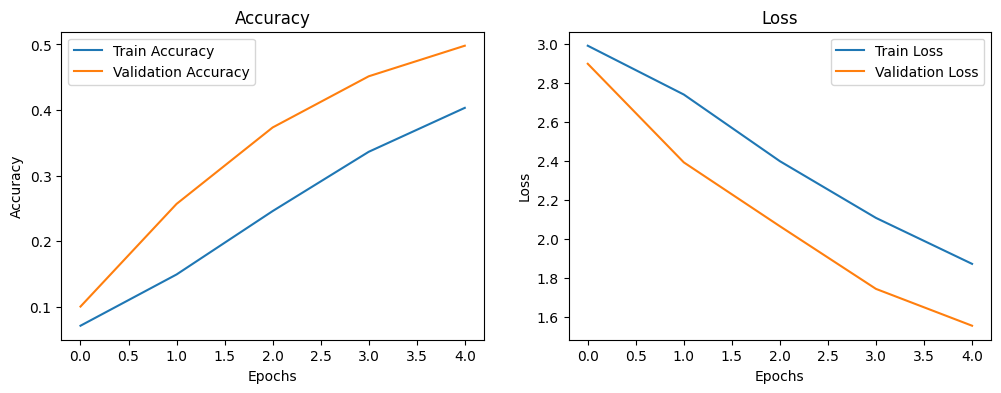

Model saved at /tmp/scene_classification_model.h5


In [18]:
import os
import pandas as pd
import shutil
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
base_path = "/Users/leo/Desktop"
images_dir = os.path.join(base_path, "images")
train_csv = os.path.join(base_path, "train.csv")
test_csv = os.path.join(base_path, "test.csv")
validation_csv = os.path.join(base_path, "validation.csv")
output_dir = os.path.join(base_path, "images_train_test_val")
train_dir = os.path.join(output_dir, "train")
test_dir = os.path.join(output_dir, "test")
val_dir = os.path.join(output_dir, "val")
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
def organize_images(csv_path, output_dir):
    df = pd.read_csv(csv_path)
    for _, row in df.iterrows():
        src = os.path.join(images_dir, row['Filename'])  # Get image file
        dst_class_dir = os.path.join(output_dir, row['ClassName'])  # Use class name as subdirectory
        os.makedirs(dst_class_dir, exist_ok=True)
        shutil.copy(src, dst_class_dir)
print("Organizing train images...")
organize_images(train_csv, train_dir)
print("Organizing test images...")
organize_images(test_csv, test_dir)
print("Organizing validation images...")
organize_images(validation_csv, val_dir)
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_test_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
EPOCHS = 50
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = list(test_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
writable_dir = "/tmp"  # Change this to a known writable path if necessary
save_path = os.path.join(writable_dir, "scene_classification_model.h5")
try:
    model.save(save_path)
    print(f"Model saved at {save_path}")
except OSError as e:
    print(f"Failed to save the model. Error: {e}")
    print("Make sure the save path is writable.")
